In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from scipy.io import wavfile
import IPython.display as ipd

import librosa

# Read the audio file (replace 'your_audio_file.wav' with your file)
sample_rate, signal = wavfile.read('myaudio.wav')



In [18]:
signal = signal.astype(float)

In [19]:
ipd.Audio(signal, rate = sample_rate)

In [20]:
#Lets inject some noise into it 
def noise(data):
    noise_amp = 0.035 * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.uniform(size = data.shape[0])
    return data

noisy_signal = noise(signal)

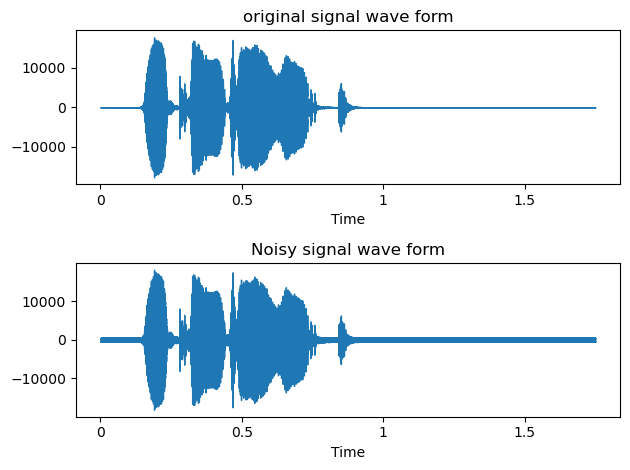

In [21]:

plt.subplot(2, 1, 1)
plt.title('original signal wave form')
librosa.display.waveshow(y = signal[:100000], sr = sample_rate)

plt.subplot(2, 1, 2)
plt.title('Noisy signal wave form')
librosa.display.waveshow(y = noisy_signal[:100000], sr = sample_rate)
plt.tight_layout()

In [22]:
ipd.Audio(noisy_signal, rate  = sample_rate)

### Lets do the fft and remove the amp from the spectrum


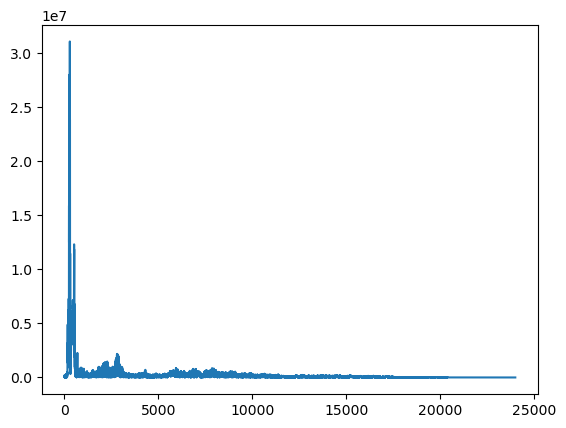

In [23]:
#FFT for original audio 
original_fft = fft(signal)
magnitude_original = np.abs(original_fft)
phase = np.angle(original_fft)
frequency_original = np.linspace(0, int(sample_rate/2), int(len(signal)/2))

#Visualize fft
plt.plot(frequency_original , magnitude_original[:int(len(signal)/2)])

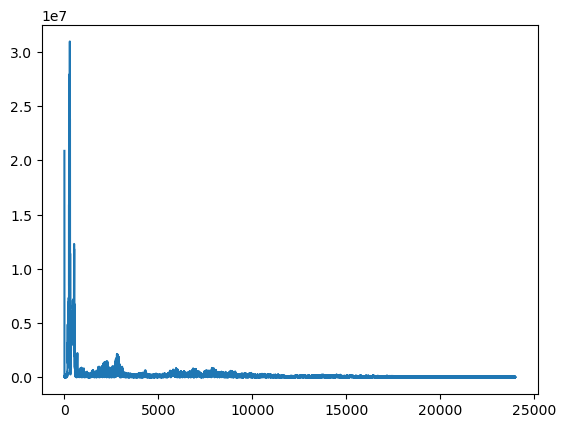

In [24]:
#FFT for noisy audio 
noisy_fft = fft(noisy_signal)
magnitude_noisy = np.abs(noisy_fft)
phase_noisy = np.angle(noisy_fft)
frequency_noisy = np.linspace(0, int(sample_rate/2), int(len(noisy_signal)/2))

#Visualize fft
plt.plot(frequency_noisy , magnitude_noisy[:int(len(noisy_signal)/2)])

### frequencies of noisy signal compared to original one

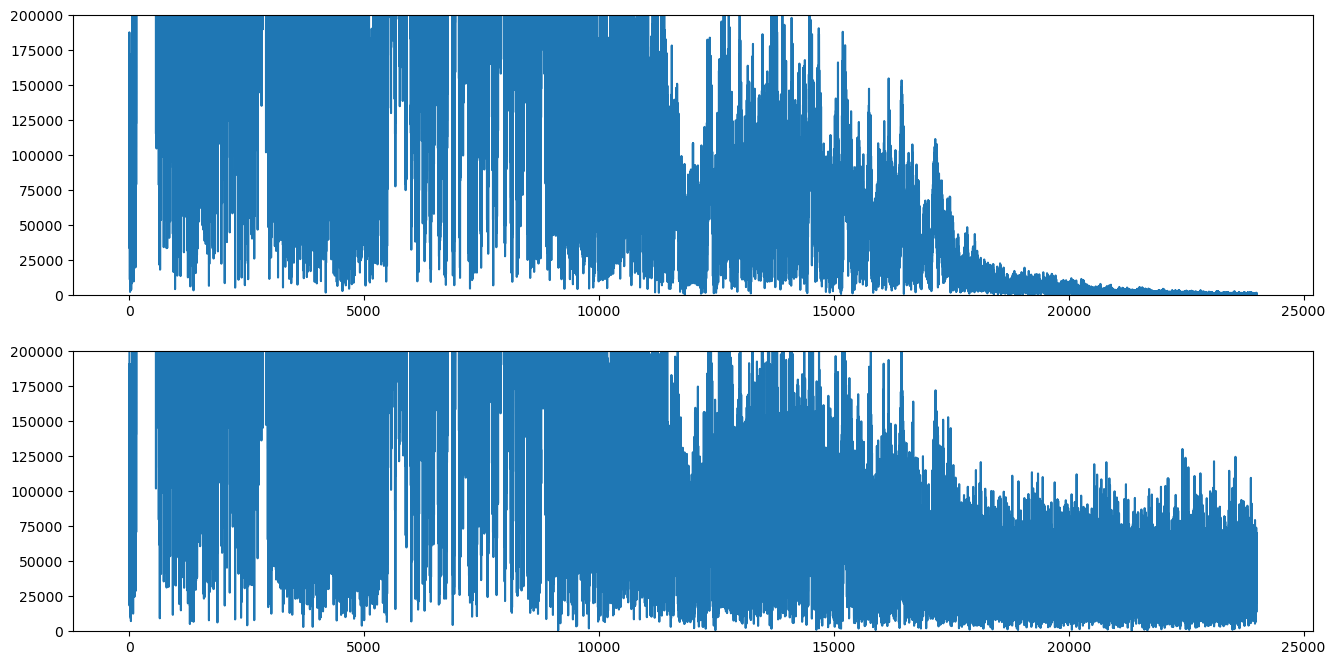

In [25]:
#As we know the noise is in all frequencies but with some energy, we can try to remove that energy across all the frequencies..

#But before that lets zoom into it a bit 

plt.figure(figsize = (16, 8))
plt.subplot(2,1,1)
plt.ylim([0, 200000])
plt.plot(frequency_original , magnitude_original[:int(len(signal)/2)])

plt.subplot(2,1,2)
plt.ylim([0, 200000])
plt.plot(frequency_noisy , magnitude_noisy[:int(len(signal)/2)])



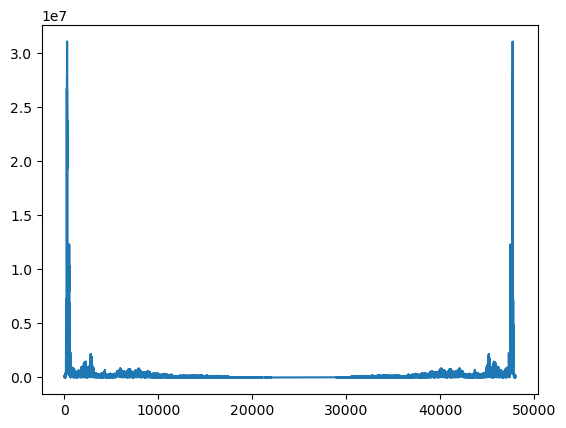

In [26]:
plt.plot(np.linspace(0, int(sample_rate), int(len(noisy_signal))) , magnitude_original)

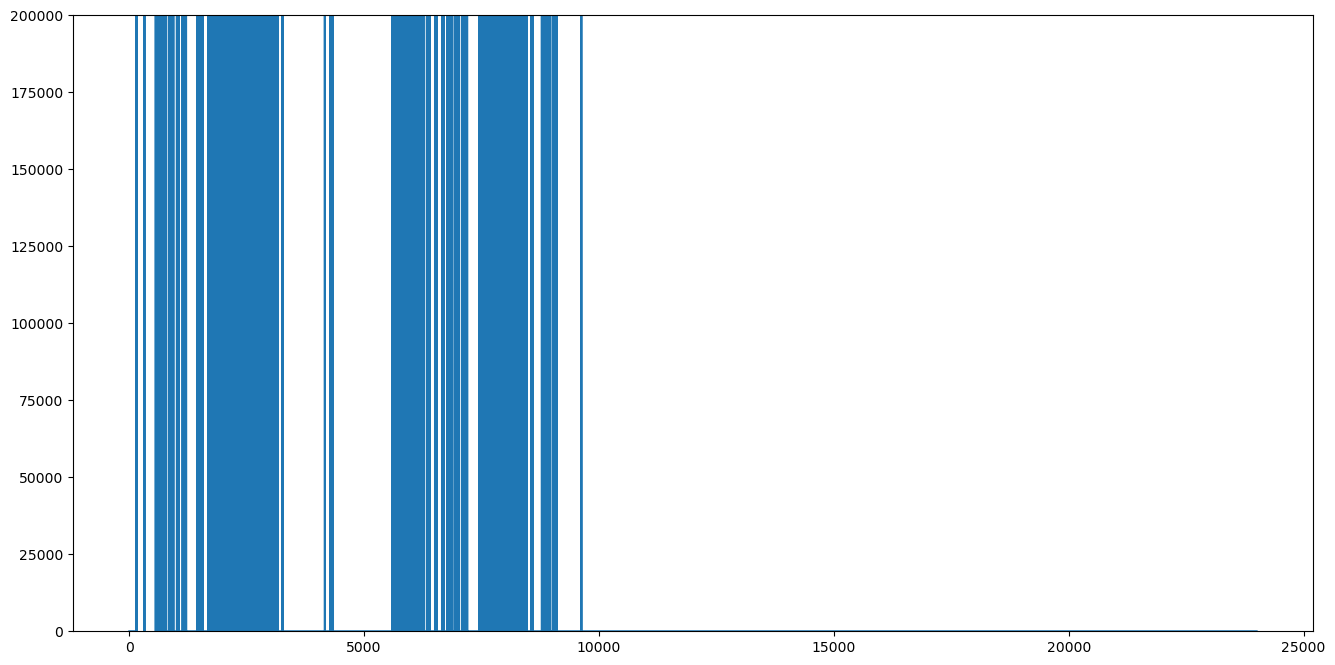

In [33]:
#lets try removing magnitude of below 4,00,000 from original signal 

magnitude_original[magnitude_original < 400000] = 0
#plotting the graph 
plt.figure(figsize = (16, 8))
plt.ylim([0, 200000])
plt.plot(frequency_original , magnitude_original[:int(len(signal)/2)])

fft_modified = magnitude_original * np.exp(1j * phase)



cleaned_signal = ifft(fft_modified).real

ipd.Audio(cleaned_signal, rate = sample_rate)

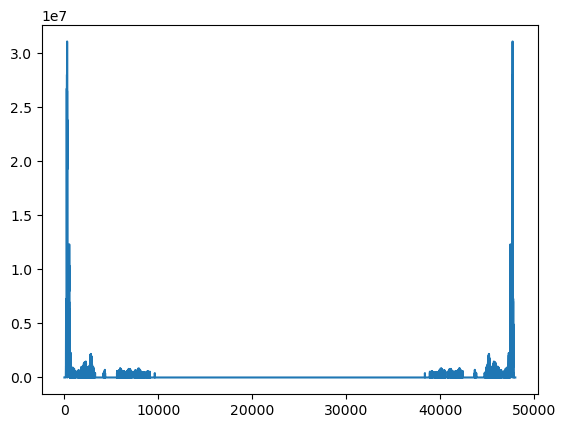

In [34]:
plt.plot(np.linspace(0, int(sample_rate), int(len(noisy_signal))) , np.abs(fft_modified))

#### Modification didn't change much to the signal.. 

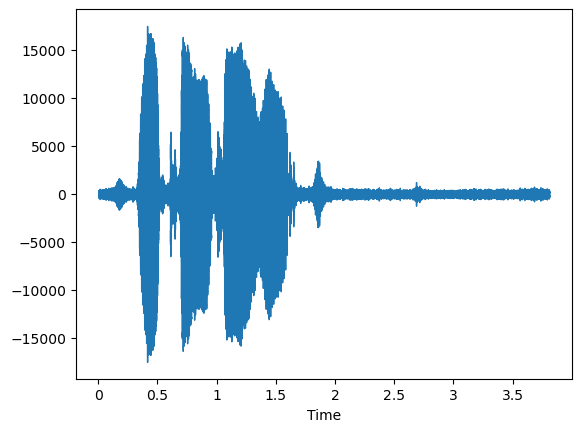

In [36]:
librosa.display.waveshow(cleaned_signal)

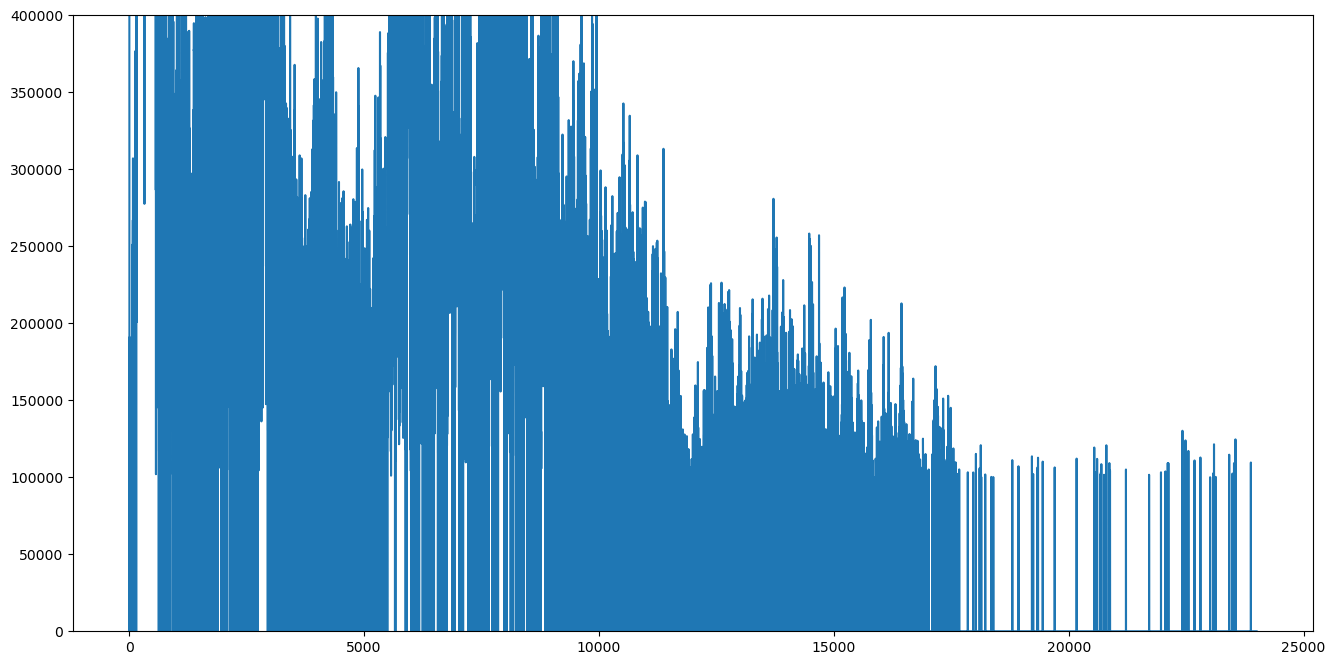

In [40]:
#Lets remove the some freq components whos amp is low 
#lets try removing magnitude of below 10,0000 from original signal 

magnitude_noisy[magnitude_noisy < 100000] = 0
#plotting the graph 
plt.figure(figsize = (16, 8))
plt.ylim([0, 400000])
plt.plot(frequency_noisy , magnitude_noisy[:int(len(noisy_signal)/2)])

fft_modified_noisy = magnitude_noisy * np.exp(1j * phase_noisy)



cleaned_signal = ifft(fft_modified_noisy).real

ipd.Audio(cleaned_signal, rate = sample_rate)


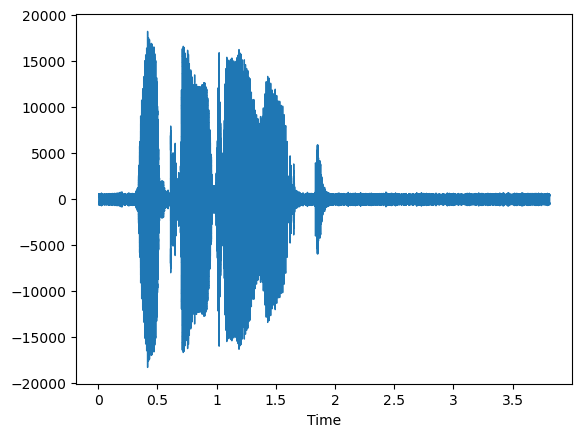

In [41]:
librosa.display.waveshow(cleaned_signal)

## Feels like removed but even the original audio speech loudness got reduced right? 

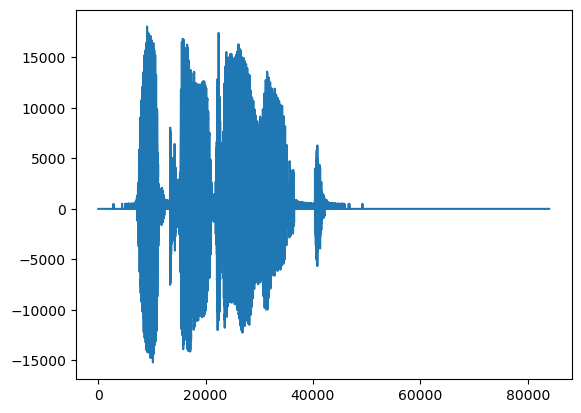

In [44]:
#Hey, why not just remove amp from the waveform?
noisy_signal[(noisy_signal < 500) & (noisy_signal > -500)] = 0 
plt.plot(noisy_signal)
ipd.Audio(noisy_signal, rate = sample_rate)

### It does work.. but did you see somehting.. you can listen to the noise when there is a speech.. Interesting. Its the reason why we use fft and remove magnitude only for few frequencies 